Description of the data Can be found at https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from subprocess import check_output

# Block all warning for presentation to look clean
import warnings
warnings.filterwarnings('ignore')

#Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
pwd

'C:\\Users\\abandyop\\Project_Accidents'

In [6]:
#Data Files We have
#print(check_output(["ls", "data/"]).decode("utf8"))

In [5]:
df = pd.read_csv('data/accident_2015.csv')

In [7]:
states = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 
          6: 'California', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 
          11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 
          16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 
          21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 
          25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 
          28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 
          32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 
          36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 
          40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico', 
          44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 
          48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 52: 'Virgin Islands', 
          53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}

df['state']=df['STATE'].apply(lambda x: states[x])

In [8]:
df['state'].value_counts().to_frame().transpose()

,Texas,California,Florida,Georgia,North Carolina,Pennsylvania,New York,Ohio,Illinois,South Carolina,Michigan,Tennessee,Arizona,Missouri,Alabama,Indiana,Virginia,Louisiana,Kentucky,Mississippi,Oklahoma,Wisconsin,New Jersey,Colorado,Washington,Arkansas,Maryland,Oregon,Minnesota,Massachusetts,Kansas,Nevada,Iowa,New Mexico,Utah,Connecticut,West Virginia,Nebraska,Montana,Idaho,Maine,Wyoming,Delaware,South Dakota,North Dakota,New Hampshire,Hawaii,Alaska,Vermont,Rhode Island,District of Columbia
state,3190,3123,2699,1329,1275,1102,1061,1029,914,911,896,888,811,803,784,752,712,698,694,604,590,523,521,507,499,491,479,411,375,328,322,297,282,269,258,257,246,218,204,198,144,129,127,116,111,103,85,60,50,41,23


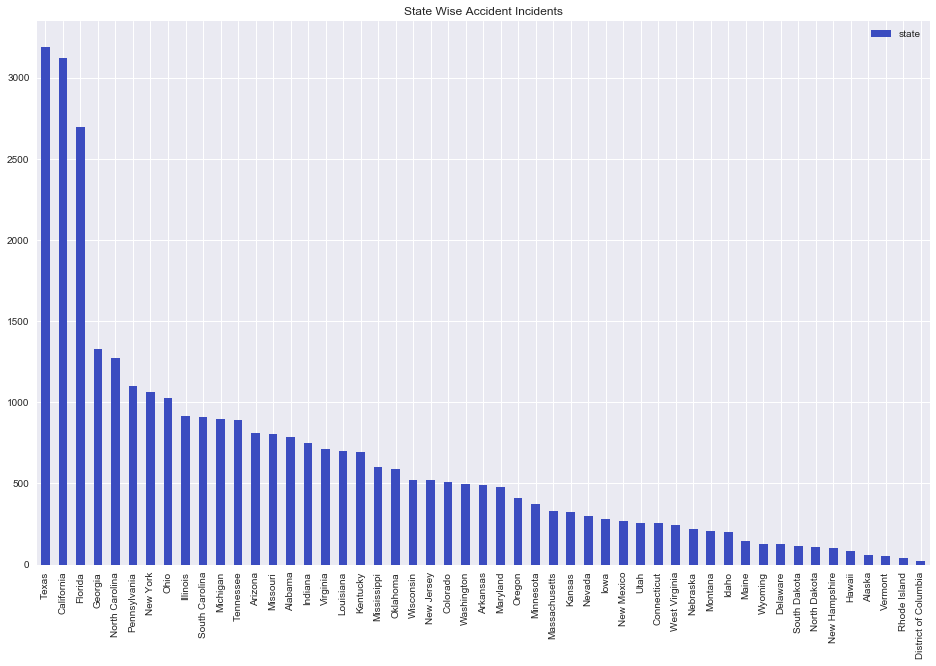

In [9]:
# Plotting State Wise Accident Incidents
df['state'].value_counts().to_frame().plot(kind='bar',figsize=(16,10),title='State Wise Accident Incidents',cmap='coolwarm')

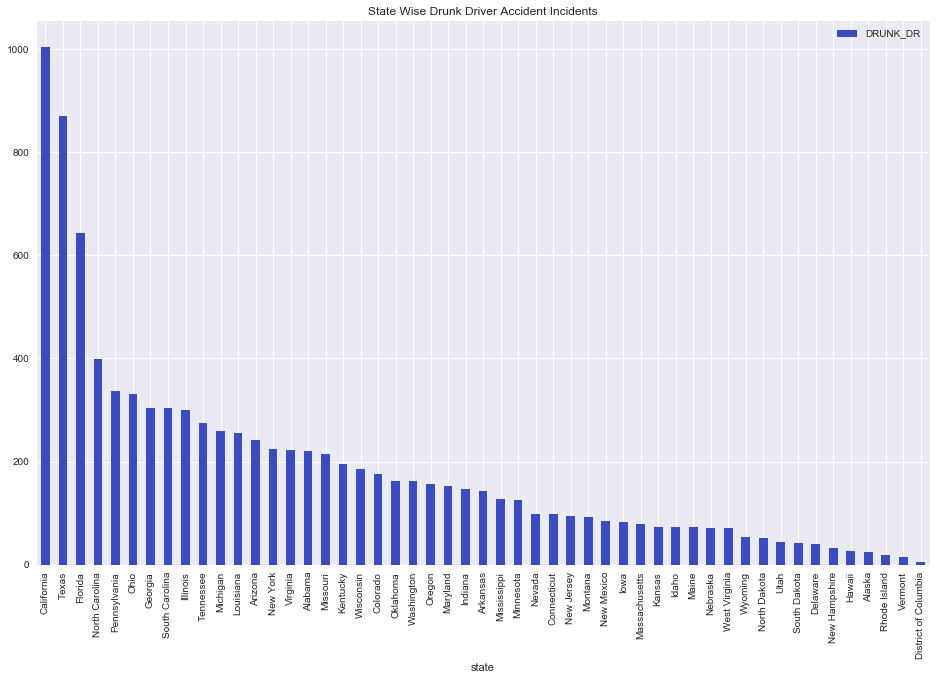

In [10]:
#Drunk Driver Accident incidents
df_drunk = pd.concat([df['state'],df['DRUNK_DR']],axis=1)
df_drunk.groupby('state').sum().sort_index(by='DRUNK_DR',ascending=False).plot(kind='bar',figsize=(16,10),title='State Wise Drunk Driver Accident Incidents',cmap='coolwarm')

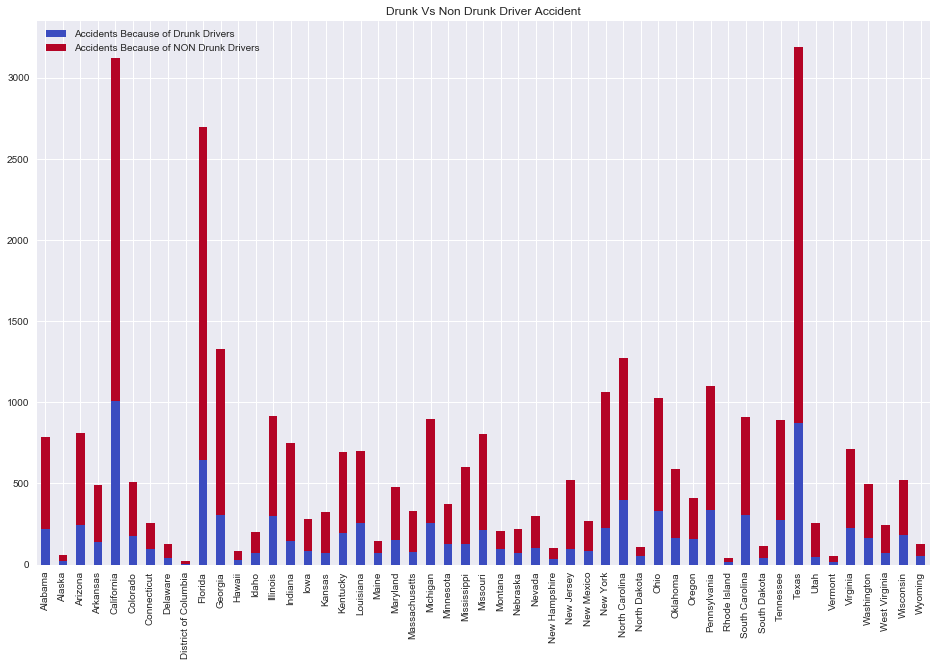

In [11]:
df_nd = pd.concat([df['state'].value_counts().to_frame() , df_drunk.groupby('state').sum().sort_index(by='DRUNK_DR',ascending=False)],axis=1,)
df_nd['Accidents Because of NON Drunk Drivers']  = df_nd.state -  df_nd.DRUNK_DR
df_nd.columns = ['Total Accidents','Accidents Because of Drunk Drivers','Accidents Because of NON Drunk Drivers']
df_nd.iloc[:,1:3].plot(kind='bar',figsize=(16,10),title='Drunk Vs Non Drunk Driver Accident',stacked=True,cmap='coolwarm')

In [12]:
def f(x):
    year = x[0]
    month = x[1]
    day = x[2]
    hour = x[3]
    minute = x[4]
    # Sometimes they don't know hour and minute
    if hour == 99:
        hour = 0
    if minute == 99:
        minute = 0
    s = "%02d-%02d-%02d %02d:%02d:00" % (year,month,day,hour,minute)
    c = datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
    return c
 
df['crashTime']   = df[['YEAR','MONTH','DAY','HOUR','MINUTE']].apply(f, axis=1)
df['crashDay']    = df['crashTime'].apply(lambda x: x.date())
df['crashMonth']  = df['crashTime'].apply(lambda x: x.strftime("%b") )
df['crashMonthN'] = df['crashTime'].apply(lambda x: x.strftime("%d") ) # sorting
df['crashTime'].head()

0   2015-01-01 02:40:00
1   2015-01-01 22:13:00
2   2015-01-01 01:25:00
3   2015-01-04 00:57:00
4   2015-01-07 07:09:00
Name: crashTime, dtype: datetime64[ns]

In [13]:
df['crashMonth'].value_counts()

Oct    3070
Aug    3049
Jul    3021
Sep    2904
May    2869
Dec    2862
Jun    2790
Nov    2780
Apr    2439
Mar    2401
Jan    2371
Feb    1983
Name: crashMonth, dtype: int64

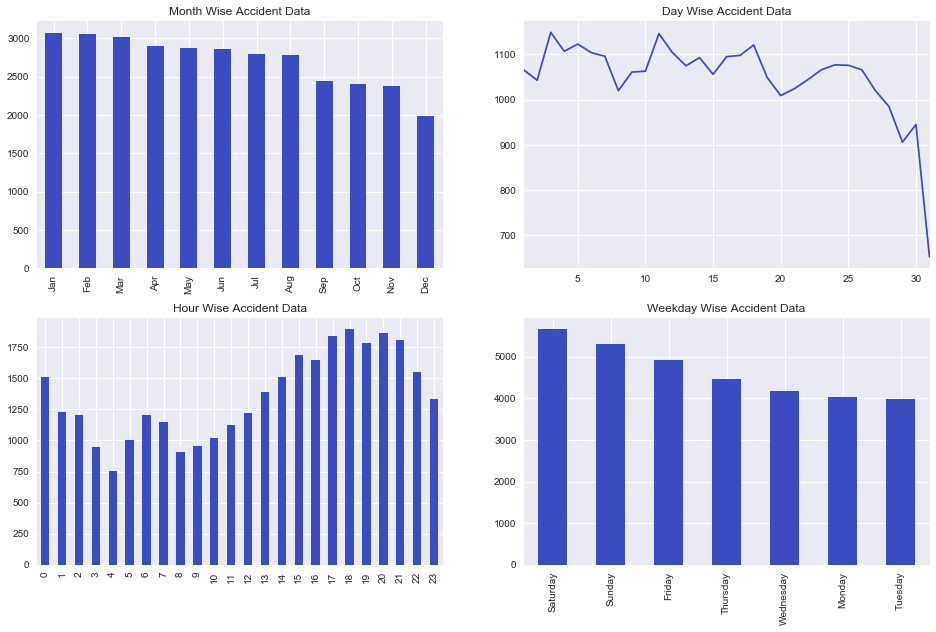

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16, 10))
k=df['crashMonth'].value_counts()
k.index  = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
k.plot(ax=axes[0,0],kind='bar',title='Month Wise Accident Data',cmap='coolwarm')


df['crashTime'].apply(lambda x:x.day).value_counts().sort_index().plot(ax=axes[0,1],title='Day Wise Accident Data',cmap='coolwarm')

df['crashTime'].apply(lambda x:x.hour).value_counts().sort_index().plot(kind='bar',ax=axes[1,0],title='Hour Wise Accident Data',cmap='coolwarm')

df['crashTime'].apply(lambda x:x.strftime('%A')).value_counts().plot(kind='bar',ax=axes[1,1],title='Weekday Wise Accident Data',cmap='coolwarm')

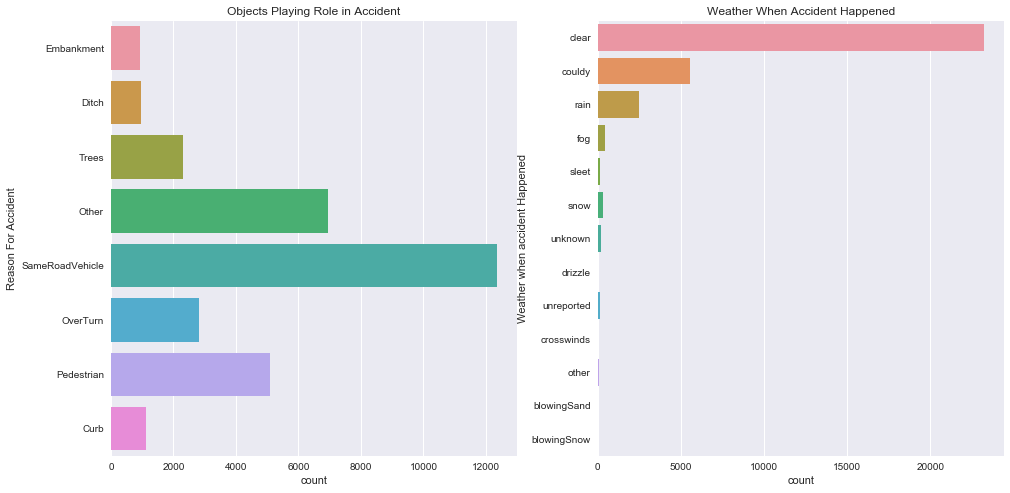

In [15]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
df['HARM_EV'].value_counts().head()
harm_ev= {12: 'SameRoadVehicle', 8: 'Pedestrian', 1: 'OverTurn', 42: 'Trees', 
          33: 'Curb', 34: 'Ditch', 35: 'Embankment'}

df['harm_ev']=df['HARM_EV'].apply(lambda x: harm_ev[x] if (x==12 or x==8 or x==1 or x==42 or x==33 or x==34 or x== 35)  else 'Other')
#df['harm_ev'].value_counts().plot(kind='bar',title='Environment Playing Role in Accident',cmap='coolwarm')
sns.countplot(y=df['harm_ev'],ax=ax1)
ax1.set_ylabel('Reason For Accident')
ax1.set_title('Objects Playing Role in Accident')


df['WEATHER'].value_counts()
weather = {1:'clear',10:'couldy',2:'rain',5:'fog',4:'snow',99:'unknown',3:'sleet',98:'unreported',8:'other',12:'drizzle',11:'blowingSnow',6:'crosswinds',7:'blowingSand'}

df['weather']=df['WEATHER'].apply(lambda x: weather[x] )
sns.countplot(y=df['weather'],ax=ax2)
plt.ylabel('Weather when accident Happened')
plt.title('Weather When Accident Happened')
#df['weather'].value_counts().plot.bar(figsize=(8,4))

In [16]:
df.columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR', 'state', 'crashTime', 'crashDay', 'crashMonth',
       'crashMonthN', 'harm_ev', 'weather'],
      dtype='object')

In [17]:
df['crashTime'].head()

0   2015-01-01 02:40:00
1   2015-01-01 22:13:00
2   2015-01-01 01:25:00
3   2015-01-04 00:57:00
4   2015-01-07 07:09:00
Name: crashTime, dtype: datetime64[ns]

In [18]:
rng = pd.date_range('1/1/2015','31/12/2015',  freq='1H')

In [19]:
ts = pd.Series(np.random.randint(0, 5, len(rng)), index=rng)

In [20]:
ts.head()

2015-01-01 00:00:00    1
2015-01-01 01:00:00    0
2015-01-01 02:00:00    0
2015-01-01 03:00:00    1
2015-01-01 04:00:00    3
Freq: H, dtype: int32

In [22]:
df['crashTime'][0]

Timestamp('2015-01-01 02:40:00')

In [23]:
df['crashTime'].dt.day[0]

1

In [93]:
ts_count.head()
datetime.datetime.

,index,Crash_no,Day,Month,Hour,Weekday
0,2015-01-01 00:00:00,5.0,1,Jan,0,Thursday
1,2015-01-01 01:00:00,12.0,1,Jan,1,Thursday
2,2015-01-01 02:00:00,17.0,1,Jan,2,Thursday
3,2015-01-01 03:00:00,6.0,1,Jan,3,Thursday
4,2015-01-01 04:00:00,7.0,1,Jan,4,Thursday


In [27]:
m=df
m['crashTime'].head()

0   2015-01-01 02:40:00
1   2015-01-01 22:13:00
2   2015-01-01 01:25:00
3   2015-01-04 00:57:00
4   2015-01-07 07:09:00
Name: crashTime, dtype: datetime64[ns]

In [29]:
ts_count= pd.DataFrame(m['crashTime'].apply(lambda x:x.replace(microsecond=0,second=0,minute=0)).value_counts(),index=rng)

ts_count.columns=['Crash_no']

ts_count['Crash_no'].fillna(0)
ts_count.reset_index(inplace=True)
ts_count.columns
ts_count['Day']    = ts_count['index'].apply(lambda x: x.day)
ts_count['Month']  = ts_count['index'].apply(lambda x: x.strftime("%b") )
ts_count['Hour']  = ts_count['index'].apply(lambda x: x.hour )
ts_count['Weekday'] = ts_count['index'].apply(lambda x:x.strftime('%A'))

In [33]:
ts_count.head()

,index,Crash_no,Day,Month,Hour,Weekday
0,2015-01-01 00:00:00,5.0,1,Jan,0,Thursday
1,2015-01-01 01:00:00,12.0,1,Jan,1,Thursday
2,2015-01-01 02:00:00,17.0,1,Jan,2,Thursday
3,2015-01-01 03:00:00,6.0,1,Jan,3,Thursday
4,2015-01-01 04:00:00,7.0,1,Jan,4,Thursday


In [34]:
df_ml = ts_count[['Day', 'Month', 'Hour', 'Weekday','Crash_no']]

In [35]:
ts_count.columns

Index(['index', 'Crash_no', 'Day', 'Month', 'Hour', 'Weekday'], dtype='object')

In [36]:
df_ml.head()

,Day,Month,Hour,Weekday,Crash_no
0,1,Jan,0,Thursday,5.0
1,1,Jan,1,Thursday,12.0
2,1,Jan,2,Thursday,17.0
3,1,Jan,3,Thursday,6.0
4,1,Jan,4,Thursday,7.0


In [306]:
rng = pd.date_range('1/1/2015','31/12/2015',  freq='1D')
df_day= pd.DataFrame(m['crashTime'].apply(lambda x:x.replace(microsecond=0,second=0,minute=0,hour=0)).value_counts(),index=rng)

df_day.columns=['Crash_no']

df_day['Crash_no'].fillna(0)
df_day.reset_index(inplace=True)
df_day.columns
df_day['Day']    = df_day['index'].apply(lambda x: x.day)
df_day['Month']  = df_day['index'].apply(lambda x: x.strftime("%b") )
df_day['Hour']  = df_day['index'].apply(lambda x: x.hour )
df_day['Weekday'] = df_day['index'].apply(lambda x:x.strftime('%A'))

df_stats=df_day
df_stats['Crash_no']=df_stats['Crash_no'].fillna(0)


df_stats['Hour']=df_stats['Hour'].apply(str)
df_stats['Day']=df_stats['Day'].apply(str)
import statsmodels.formula.api as smf
mod = smf.ols(formula='Crash_no ~ Day+ Month+Weekday', data=df_stats)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Crash_no   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     12.76
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.79e-49
Time:                        12:57:19   Log-Likelihood:                -1398.7
No. Observations:                 365   AIC:                             2893.
Df Residuals:                     317   BIC:                             3081.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               86.6767 

Here Adjusted R sq =60.3. So,60.3% of the variance of the data is explainable with only these features only and also we can see the p-value of Day feature isn't Statistically significant, So we remove the feature and retrain our model. 


In [307]:
mod = smf.ols(formula='Crash_no ~ Month+Weekday', data=df_stats)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Crash_no   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           9.46e-63
Time:                        13:00:00   Log-Likelihood:                -1415.2
No. Observations:                 365   AIC:                             2866.
Df Residuals:                     347   BIC:                             2937.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               87.1431 

We can see after removing Day also we have Adjusted R sq as 60.3%. Which is a pretty good score considering we are predicting with Month and weekday only

In [317]:
x = pd.concat([pd.get_dummies(df_day['Day'], prefix ='Day',drop_first=True),pd.get_dummies(df_day['Month'], prefix ='Month',drop_first=True),
              pd.get_dummies(df_day['Weekday'], prefix ='Weekday',drop_first=True)], axis=1)
Y= df_day['Crash_no'].fillna(0)

In [318]:
x.head()

,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_2,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_3,Day_30,Day_31,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [319]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

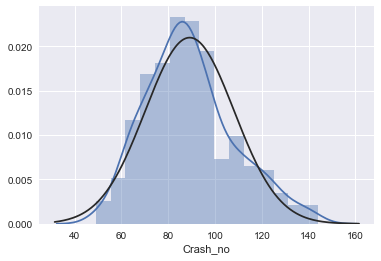

In [320]:
from scipy.stats import norm
sns.distplot(Y,fit=norm);

In [321]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [322]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [323]:
models =[lm,lasso,ENet,KRR,GBoost,model_xgb,model_lgb]
model_name=['Multiple Linear Regression','Lasso Regression','Elastic Net','Kernel Ridge','Gradient Boosting','Xg Boost','Light Gradient Boosting']

In [324]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [325]:
model_score=pd.DataFrame(columns=['Name','Mean_Rmse','Std_dev'])
for i in range(len(models)):
    model_score.loc[i,'Name'] = model_name[i]
    model_score.loc[i,'Mean_Rmse'] = rmsle_cv(models[i]).mean()
    model_score.loc[i,'Std_dev'] = rmsle_cv(models[i]).std()

In [326]:
model_score

,Name,Mean_Rmse,Std_dev
0,Multiple Linear Regression,0.751339,0.0771762
1,Lasso Regression,0.740172,0.0776544
2,Elastic Net,0.740682,0.0777543
3,Kernel Ridge,0.727522,0.0705359
4,Gradient Boosting,0.704796,0.0441579
5,Xg Boost,0.740972,0.068662
6,Light Gradient Boosting,0.684749,0.0571457


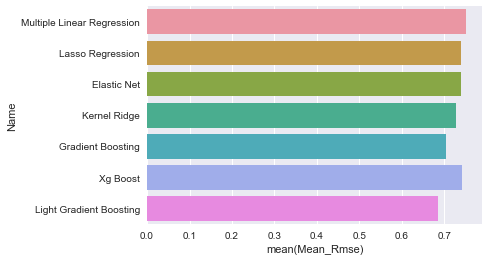

In [327]:
sns.barplot(y='Name',x='Mean_Rmse',data=model_score)

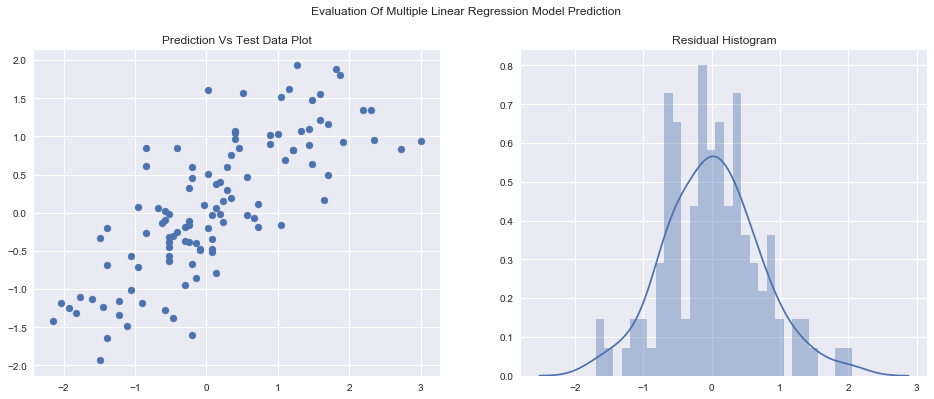

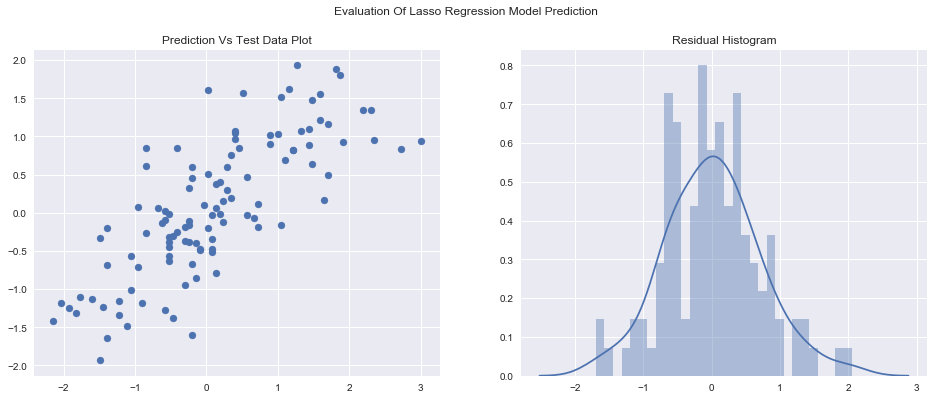

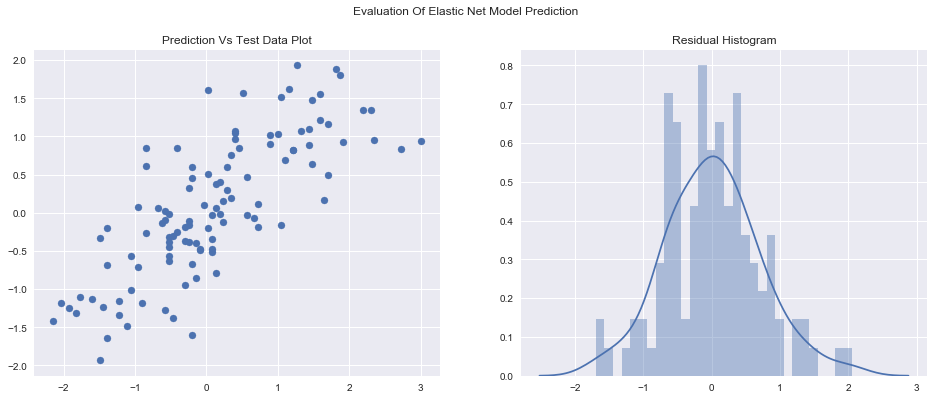

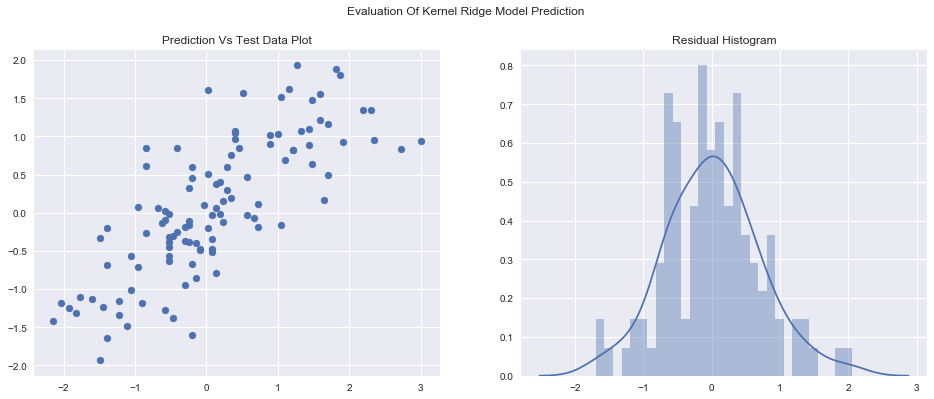

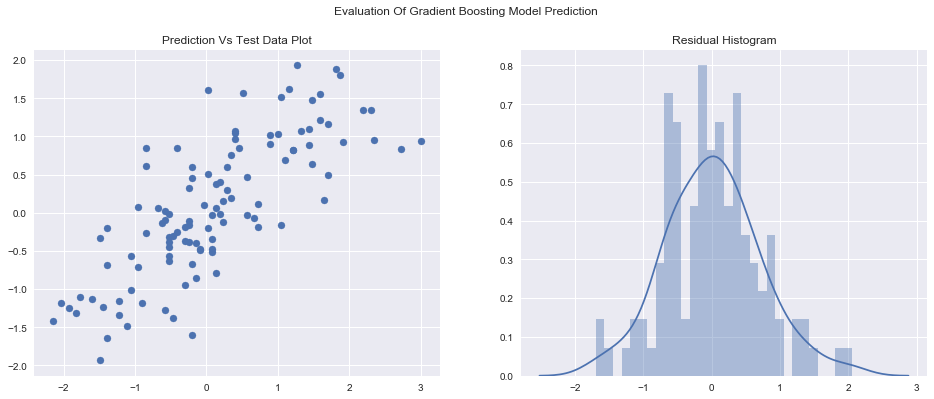

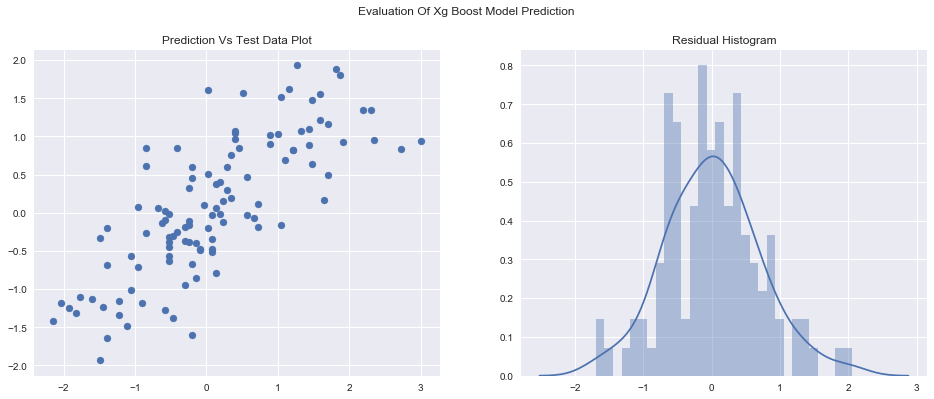

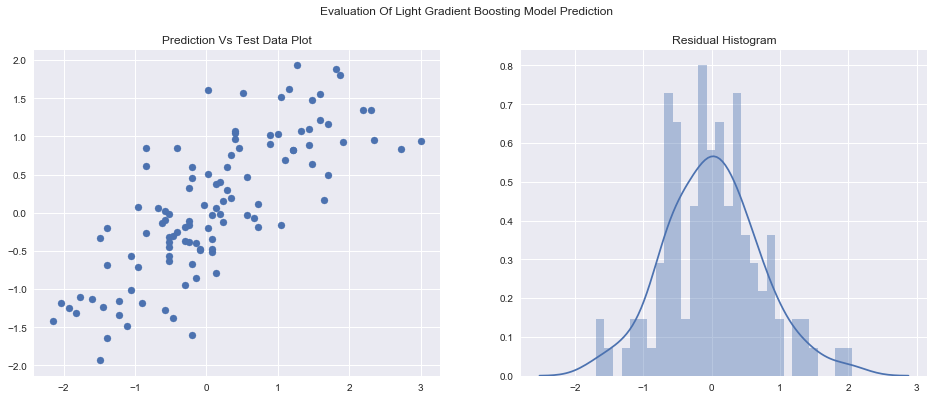

In [328]:
for i in range(len(models)):
    models[0].fit(X_train,y_train)
    predictions = models[0].predict(X_test)
    fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(16,6))
    axes[0].scatter(y_test,predictions)
    axes[0].set_title('Prediction Vs Test Data Plot')
    plt.legend()

    sns.distplot((y_test-predictions),bins=30,ax=axes[1]);
    axes[1].set_title('Residual Histogram')
    plt.suptitle('Evaluation Of '+model_name[i]+ ' Model Prediction')


After Checking all the models we can conclude the Light Gradient Boosting Model Performs the best with the least Root mean square Error.

Furthur Improvements:
     We can try with more features and with different interval of time to check the likelyhood of accidents.

For payment purpose send me a mail @ arkahome@gmail.com. I will send you an paypal invoice.
I will be able to save 20% of the fiverr commision then :-p 